# ACTIVIDAD 1: FUNCIÓN A TRAMOS. VECTORIZACIÓN

### DATOS DE PARTIDA

In [91]:
import numpy as np

# Gradiente de temperatura en función de la alitud (m, K/m).
capas=np.array([[0,11000,-6.5/1000],[11000,20000,0],[20.000,32000,1/1000]])

# Temperatura y presión al nivel del mar y resto de constantes necesarias.
T0 =288.15    # Temperatura en K
P0 =101325    # Presión en Pa
g  =9.81      # aceleración de la gravedad m/s^2
R  =287       # N*m/kg/K

### 1. FUNCIONES PARA CALCULAR LA TEMPERATURA Y PRESIÓN EN FUNCIÓN DE LA ALTITUD

In [92]:
# función de detección de errores en los datos de entrada.

def errores (entrada):
    while True:
        entrada= input("Intoduzca una altitud en m y dentro del rango [0-32000]:" )   
        if entrada.startswith('-') and entrada[1:].isdigit():
            print ("No se permiten alturas negativas. Inténtalo de nuevo")       
        elif entrada.isdigit()==False:
            print ("No se permiten caracteres. Inténtalo de nuevo")
        elif float(entrada) > 32000:
            print ("No se permiten alturas superiores a 32000. Inténtalo de nuevo")
        else:
            return float(entrada)

In [93]:
# Dato de entrada introducido por el usuario y filtrado por la función anterior.

Altitud= input("Intoduzca una altitud en m y dentro del rango [0-32000]:" )
Alt=errores (Altitud)
                        
# Función que devuelve la temperatura en K en función de la altitud en m de acuerdo a la ley de temperaturas por tramos descrita en el enunciado.
def temperatura(h):        
    if   0<=h<=11000:
         return T0+capas[0,2]*(h-0)
    elif 11000<h<=20000:
         return temperatura(11000)+capas[1,2]*(h-11000)
    elif 20000<h<=32000:
         return temperatura(20000)+capas[2,2]*(h-20000)


# Función que devuelve la presión en función de la altitud y temperatura en m y K de acuerdo a la ley de presiones por tramos descrita en el enunciado.   
def presion(h):
    if 0<=h<=11000:
         return P0*(temperatura(h)/temperatura(0))**(-g/capas[0,2]/R)
    elif 11000<h<=20000:
         return presion(11000)*np.exp(-g/R/temperatura(h)*(h-11000))
    elif 20000<h<=32000:
         return presion(20000)*(temperatura(h)/temperatura(20000))**(-g/capas[2,2]/R)

print(f" {temperatura(Alt):0.2f} K \n {presion(Alt):0.2f} Pa")       

Intoduzca una altitud en m y dentro del rango [0-32000]: dfhhsdg


No se permiten caracteres. Inténtalo de nuevo


Intoduzca una altitud en m y dentro del rango [0-32000]: asdfaf3123


No se permiten caracteres. Inténtalo de nuevo


Intoduzca una altitud en m y dentro del rango [0-32000]: 25000


 221.65 K 
 2506.14 Pa


### 2. MODIFICACIÓN PARA QUE EL ARGUMENTO DE ENTRADA SEA UN VECTOR ALTITUD

In [94]:
# lista de altitudes introducidas por el usuario y posteriormente filtrada dato a dato por la función map.
Altitud_2=list(item for item in input("Introduzca una lista de altitudes en m separadas por , : ").strip().split(","))
Alt_2= list(map(errores, Altitud_2)) 

# funciones anónimas lambda que a través de la función map aplican un vector de altitudes dado y devuelven los vectores temperatura y presión correspondientes.
# Se han aplicado funciones lambda para poder utilizarla en el apartado siguiente.
Temperatura_vector = lambda altitud: list(map(temperatura,altitud))
Presion_vector     = lambda altitud: list(map(presion,altitud))

print(f" {np.round(Temperatura_vector(Alt_2),2)}K \n {np.round(Presion_vector(Alt_2),2)} Pa")   

Introduzca una lista de altitudes en m separadas por , :  25000,15000,0


 [221.65 216.65 288.15]K 
 [  2506.14  12031.07 101325.  ] Pa


### 3. ARRAY NUMPY 321 FILAS (0-32000 m en intervalos de 100 m) INCLUYENDO TEMPERATURAS Y PRESIONES PARA CADA ALTITUD

In [95]:
# Creamos un array con las altitudes, aplicamos las funciones lambda previamente creadas y por último un vector traspuesto que recoja los tres anteriores en columnas 
Altitud_vector  = np.arange(0,32100,100)
Temperatura     = Temperatura_vector(Altitud_vector)
Presion         = Presion_vector(Altitud_vector)
AltTempPres     = np.array([Altitud_vector,Temperatura,Presion]).T

print (np.array_str(AltTempPres, precision=2, suppress_small=True))

[[     0.      288.15 101325.  ]
 [   100.      287.5  100128.81]
 [   200.      286.85  98944.09]
 [   300.      286.2   97770.74]
 [   400.      285.55  96608.69]
 [   500.      284.9   95457.84]
 [   600.      284.25  94318.13]
 [   700.      283.6   93189.46]
 [   800.      282.95  92071.75]
 [   900.      282.3   90964.92]
 [  1000.      281.65  89868.9 ]
 [  1100.      281.    88783.59]
 [  1200.      280.35  87708.92]
 [  1300.      279.7   86644.81]
 [  1400.      279.05  85591.18]
 [  1500.      278.4   84547.95]
 [  1600.      277.75  83515.04]
 [  1700.      277.1   82492.38]
 [  1800.      276.45  81479.87]
 [  1900.      275.8   80477.46]
 [  2000.      275.15  79485.06]
 [  2100.      274.5   78502.59]
 [  2200.      273.85  77529.98]
 [  2300.      273.2   76567.15]
 [  2400.      272.55  75614.03]
 [  2500.      271.9   74670.54]
 [  2600.      271.25  73736.6 ]
 [  2700.      270.6   72812.15]
 [  2800.      269.95  71897.11]
 [  2900.      269.3   70991.4 ]
 [  3000. 

### 4. REPRESENTACIÓN GRÁFICA ALTITUD-TEMPERATURA; ALTITUD-PRESIÓN 

Text(21000, 40000, 'Altitud[20000-32000]m\nP=$P_0$e$^{-g/R/T(h-h_0)}$')

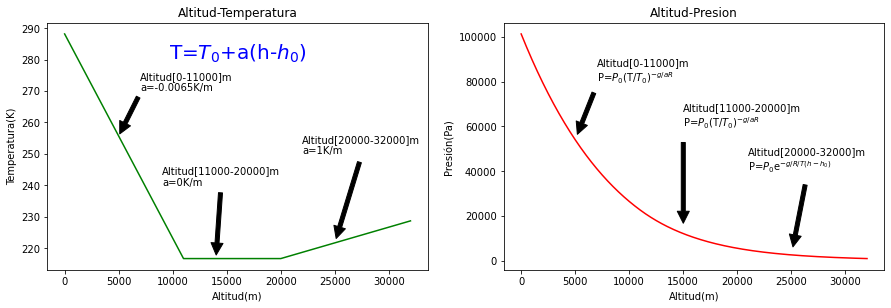

In [96]:
# Creamos las gráficas altitud-temperatura, altitud-presión con la librería matplotlib y aplicamos algunos de sus métodos para darles formato. 
%matplotlib inline
import matplotlib.pyplot as plt

a= AltTempPres[:,0]
t= AltTempPres[:,1]
p= AltTempPres[:,2]

plt.figure(1, figsize=(15, 10))
plt.subplot(221)
plt.plot(a, t, "g")
plt.title("Altitud-Temperatura")
plt.xlabel('Altitud(m)')
plt.ylabel('Temperatura(K)')
plt.text(16000, 280, "T=$T_0$+a(h-$h_0$)", fontsize=20, color='blue', horizontalalignment="center")
plt.annotate('Altitud[0-11000]m\na=-0.0065K/m', xy=(5000, 255.65), xytext=(7000, 270), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Altitud[11000-20000]m\na=0K/m', xy=(14000, 216.65), xytext=(9000, 240), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Altitud[20000-32000]m\na=1K/m', xy=(25000, 221.65), xytext=(22000, 250), arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(222)
plt.plot(a, p, "r")
plt.title("Altitud-Presion")
plt.xlabel('Altitud(m)')
plt.ylabel('Presión(Pa)')
plt.annotate('Altitud[0-11000]m\nP=$P_0$(T/$T_0$)$^{-g/aR}$', xy=(5000, 54002.02), xytext=(7000, 80000), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('Altitud[11000-20000]m\nP=$P_0$(T/$T_0$)$^{-g/aR}$', xy=(15000, 12031.07), xytext=(15000, 60000), arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('Altitud[20000-32000]m\nP=$P_0$e$^{-g/R/T(h-h_0)}$', xy=(25000, 2506.14), xytext=(21000, 40000), arrowprops=dict(facecolor='black', shrink=0.1))